In [1]:
import numpy as np

from neurodsp.sim import sim_synaptic_current

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acf

def exp_decay_func(delta_t, amplitude, tau, offset):
    return amplitude * (np.exp(-(delta_t / tau)) + offset)

In [2]:
taus = np.linspace(.001, .01, 100)


nlags = 500

n_sims = 1000

acfs = np.zeros((len(taus), nlags+1))
taus_hat =  np.zeros((len(taus)))

for ind, tau in enumerate(taus):
    
    _sig = np.zeros((n_sims, 5000))
    
    for n in range(n_sims):
        
        _sig[n] = sim_synaptic_current(n_seconds=1, fs=5000, tau_d=tau)
    
    sig = np.mean(_sig, axis=0)
    
    acfs[ind] = acf(sig, nlags=nlags, qstat=False, fft=True)

    params, _ = curve_fit(exp_decay_func, np.arange(0, len(acfs[ind])), acfs[ind], maxfev=10000)

    taus_hat[ind] = params[1]

Text(0.5, 0, 'Simulated Tau (tau_d sim_synaptic_current)')

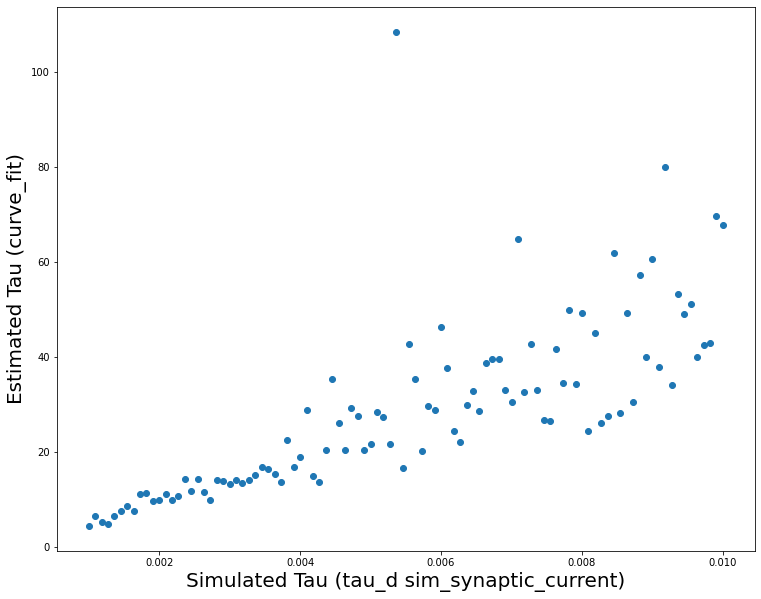

In [3]:
fig = plt.figure(figsize=(12.5, 10))

plt.scatter(taus, taus_hat)

plt.ylabel('Estimated Tau (curve_fit)', size=20)
plt.xlabel('Simulated Tau (tau_d sim_synaptic_current)', size=20)

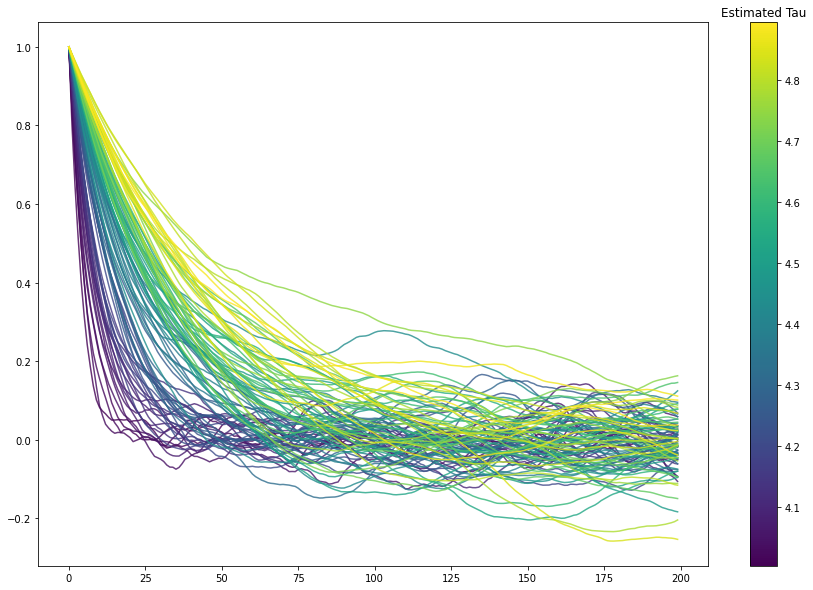

In [4]:
fig = plt.figure(figsize=(15, 10))

norm=plt.Normalize(vmin=taus_hat.min(), vmax=taus_hat.min().max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
cbar = plt.colorbar(sm)
cbar.ax.set_title("Estimated Tau")
cmap = plt.get_cmap('viridis', len(acfs))

for n in range(len(acfs)):
    plt.plot(acfs[n][:200], color=cmap(n), alpha=.8)